# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

2021-09-14 12:47:31.351301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-14 12:47:31.351318: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [2]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [3]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

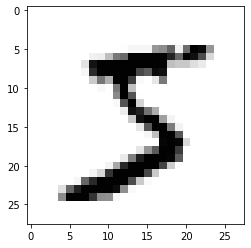

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [3]:
#Esta celda se debe ejecutar una sola vez

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [12]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [4]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [5]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [8]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #Input layer
model.add(keras.layers.Dense(300, activation = 'relu')) #Hidden layer
model.add(keras.layers.Dense(100, activation = 'relu')) #Hidden layer
model.add(keras.layers.Dense(10, activation = 'softmax')) #Output layer

2021-09-14 12:45:02.962200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-14 12:45:02.962550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-14 12:45:02.962579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-14 12:45:02.962601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-14 12:45:02.962623: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [6]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
]

model = keras.Sequential(capas)

2021-09-14 12:47:50.949512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-14 12:47:50.949837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-14 12:47:50.949864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-14 12:47:50.949885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-14 12:47:50.949906: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Podemos ver las capas, y acceder a sus elementos

In [10]:
model.layers

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [11]:
hidden_1 = model.layers[1]
weights, biases = hidden_1.get_weights()
weights

array([[-0.02989004, -0.0013679 ,  0.02384138, ...,  0.0716759 ,
         0.04747208, -0.05276591],
       [-0.07393462,  0.05538675,  0.01205418, ..., -0.03834323,
         0.02322552, -0.01466092],
       [ 0.06902184,  0.04943595, -0.04662535, ..., -0.02901402,
        -0.01971202,  0.0305252 ],
       ...,
       [-0.01008613, -0.01439381,  0.03807601, ...,  0.05119069,
         0.06156372, -0.03285758],
       [ 0.05895877,  0.04406012,  0.01414423, ...,  0.05022259,
         0.00184486, -0.03279894],
       [-0.05346923,  0.05145916, -0.00220145, ...,  0.0517759 ,
        -0.01476304,  0.0018737 ]], dtype=float32)

In [21]:
biases[20:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Establecemos la configuración de ejecución... el compile.

In [ ]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [7]:
# Equivalente
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
print(X_train.shape)
print(y_train.shape)

(50000, 28, 28)
(50000,)


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [9]:
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data = (X_val, y_val)) #validation_split = 0.1 (va en %)

2021-09-14 12:48:08.471436: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
782/782 [==============================] - 1s 1ms/step - loss: 0.8918 - accuracy: 0.7816 - val_loss: 0.3934 - val_accuracy: 0.8980
Epoch 2/15
782/782 [==============================] - 1s 1ms/step - loss: 0.3741 - accuracy: 0.8964 - val_loss: 0.2999 - val_accuracy: 0.9171
Epoch 3/15
782/782 [==============================] - 1s 1ms/step - loss: 0.3092 - accuracy: 0.9124 - val_loss: 0.2661 - val_accuracy: 0.9240
Epoch 4/15
782/782 [==============================] - 1s 1ms/step - loss: 0.2751 - accuracy: 0.9215 - val_loss: 0.2526 - val_accuracy: 0.9276
Epoch 5/15
782/782 [==============================] - 1s 1ms/step - loss: 0.2499 - accuracy: 0.9296 - val_loss: 0.2228 - val_accuracy: 0.9375
Epoch 6/15
782/782 [==============================] - 1s 1ms/step - loss: 0.2295 - accuracy: 0.9347 - val_loss: 0.2100 - val_accuracy: 0.9417
Epoch 7/15
782/782 [==============================] - 1s 1ms/step - loss: 0.2125 - accuracy: 0.9399 - val_loss: 0.1954 - val_accuracy: 0.9474
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [10]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data = (X_val, y_val))

Epoch 1/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1260 - accuracy: 0.9640 - val_loss: 0.1316 - val_accuracy: 0.9644
Epoch 2/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1203 - accuracy: 0.9659 - val_loss: 0.1259 - val_accuracy: 0.9664
Epoch 3/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1147 - accuracy: 0.9677 - val_loss: 0.1222 - val_accuracy: 0.9664
Epoch 4/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1098 - accuracy: 0.9689 - val_loss: 0.1200 - val_accuracy: 0.9665
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.1052 - accuracy: 0.9707 - val_loss: 0.1166 - val_accuracy: 0.9672


Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [14]:
print(model.history.params)
print(model.history.epoch)
model.history.history

{'verbose': 1, 'epochs': 5, 'steps': 782}
[0, 1, 2, 3, 4]


{'loss': [0.12598483264446259,
  0.12032552808523178,
  0.1146988570690155,
  0.10982201993465424,
  0.1051970049738884],
 'accuracy': [0.9640399813652039,
  0.9659000039100647,
  0.9676799774169922,
  0.968940019607544,
  0.9706599712371826],
 'val_loss': [0.13157114386558533,
  0.1258690506219864,
  0.12222503870725632,
  0.11999332159757614,
  0.11655150353908539],
 'val_accuracy': [0.9643999934196472,
  0.9664000272750854,
  0.9664000272750854,
  0.9664999842643738,
  0.967199981212616]}

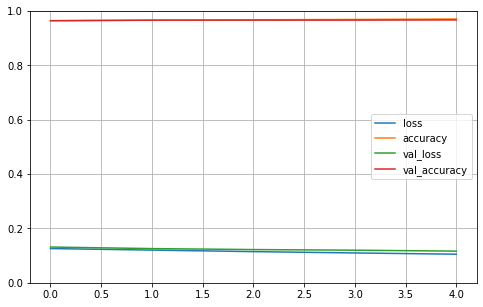

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [16]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 520us/step - loss: 0.1186 - accuracy: 0.9668


In [18]:
results #(loss, [metrics])

[0.11860053986310959, 0.9667999744415283]

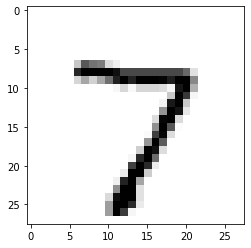

In [19]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [21]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.004, 0.028, 0.   , 0.   , 0.   , 0.968, 0.   ,
        0.   ]], dtype=float32)

In [22]:
predictions.argmax()

7

In [23]:
model.predict(X_test).argmax(axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [24]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [28]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    Dense(1)
])

model.compile(loss = 'mean_squared_error',
             optimizer = 'sgd',
             metrics = ['accuracy', 'mse'])

history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 637us/step - loss: 1.2019 - accuracy: 0.0032 - mse: 1.2019 - val_loss: 0.6629 - val_accuracy: 0.0026 - val_mse: 0.6629
Epoch 2/20
363/363 [==============================] - 0s 465us/step - loss: 0.5487 - accuracy: 0.0033 - mse: 0.5487 - val_loss: 0.4934 - val_accuracy: 0.0026 - val_mse: 0.4934
Epoch 3/20
363/363 [==============================] - 0s 506us/step - loss: 0.4646 - accuracy: 0.0033 - mse: 0.4646 - val_loss: 0.4498 - val_accuracy: 0.0026 - val_mse: 0.4498
Epoch 4/20
363/363 [==============================] - 0s 468us/step - loss: 0.4414 - accuracy: 0.0032 - mse: 0.4414 - val_loss: 0.4347 - val_accuracy: 0.0026 - val_mse: 0.4347
Epoch 5/20
363/363 [==============================] - 0s 480us/step - loss: 0.4281 - accuracy: 0.0032 - mse: 0.4281 - val_loss: 0.4194 - val_accuracy: 0.0026 - val_mse: 0.4194
Epoch 6/20
363/363 [==============================] - 0s 487us/step - loss: 0.4210 - accuracy: 0.0032 - mse: 0.4210 - va

In [29]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 343us/step - loss: 0.3531 - accuracy: 0.0027 - mse: 0.3531
[0.3531276285648346, 0.0027131782844662666, 0.3531276285648346]


In [30]:
y_pred = model.predict(X_test[:5])
y_pred

array([[1.5986602],
       [1.2231882],
       [1.8271227],
       [3.2275028],
       [1.4295579]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [31]:
model.save('my_keras_model.h5')

In [32]:
# Lo volvemos a cargar
model = keras.models.load_model('my_keras_model.h5')

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [33]:
checkpoint_vb = keras.callbacks.ModelCheckpoint('callback_model.h5')
history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_vb])

Epoch 1/10
363/363 [==============================] - 0s 382us/step - loss: 0.3659 - accuracy: 0.0033 - mse: 0.3659
Epoch 2/10
363/363 [==============================] - 0s 400us/step - loss: 0.3643 - accuracy: 0.0033 - mse: 0.3643
Epoch 3/10
363/363 [==============================] - 0s 358us/step - loss: 0.3626 - accuracy: 0.0033 - mse: 0.3626
Epoch 4/10
363/363 [==============================] - 0s 364us/step - loss: 0.3608 - accuracy: 0.0033 - mse: 0.3608
Epoch 5/10
363/363 [==============================] - 0s 380us/step - loss: 0.3586 - accuracy: 0.0032 - mse: 0.3586
Epoch 6/10
363/363 [==============================] - 0s 369us/step - loss: 0.3579 - accuracy: 0.0032 - mse: 0.3579
Epoch 7/10
363/363 [==============================] - 0s 386us/step - loss: 0.3547 - accuracy: 0.0033 - mse: 0.3547
Epoch 8/10
363/363 [==============================] - 0s 367us/step - loss: 0.3545 - accuracy: 0.0032 - mse: 0.3545
Epoch 9/10
363/363 [==============================] - 0s 376us/step - lo

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [35]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5)
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks = [checkpoint_vb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 513us/step - loss: 0.3360 - accuracy: 0.0033 - mse: 0.3360 - val_loss: 0.3316 - val_accuracy: 0.0026 - val_mse: 0.3316
Epoch 2/100
363/363 [==============================] - 0s 491us/step - loss: 0.3348 - accuracy: 0.0033 - mse: 0.3348 - val_loss: 0.3251 - val_accuracy: 0.0026 - val_mse: 0.3251
Epoch 3/100
363/363 [==============================] - 0s 509us/step - loss: 0.3368 - accuracy: 0.0033 - mse: 0.3368 - val_loss: 0.3254 - val_accuracy: 0.0026 - val_mse: 0.3254
Epoch 4/100
363/363 [==============================] - 0s 478us/step - loss: 0.3390 - accuracy: 0.0033 - mse: 0.3390 - val_loss: 0.3294 - val_accuracy: 0.0026 - val_mse: 0.3294
Epoch 5/100
363/363 [==============================] - 0s 482us/step - loss: 0.3332 - accuracy: 0.0033 - mse: 0.3332 - val_loss: 0.3298 - val_accuracy: 0.0026 - val_mse: 0.3298
Epoch 6/100
363/363 [==============================] - 0s 479us/step - loss: 0.3326 - accuracy: 0.0033 - mse: 0.332